<a href="https://colab.research.google.com/github/Harievashini/Data-Engineering/blob/main/Week%204-%20Data%20Validation/DataValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Oregon 2019.csv')
print(data)
data.head(15)

      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   1860771  ...                       NaN
2737   1860771  ...                       NaN
2738   1860771  ...                       NaN

[2739 rows x 157 columns]


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,NaN,1504.0,426,1.0,NaN,4.0,22.59,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Part B
#Existence assertion
ea1 =data[data['Crash ID']!="NaN"]
print(ea1)
ea2 =data[data['Record Type']!="NaN"]
print(ea2)

      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   1860771  ...                       NaN
2737   1860771  ...                       NaN
2738   1860771  ...                       NaN

[2739 rows x 157 columns]
      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   

In [5]:
#Limit assertion
bool_series = data['Age'].between(0.0,9.0)
print(bool_series) #The "NaN" values show False others are true

0       False
1       False
2        True
3       False
4        True
        ...  
2734    False
2735    False
2736     True
2737    False
2738     True
Name: Age, Length: 2739, dtype: bool


In [6]:
#Limit assertion
bool_series = data['Week Day Code'].between(1.0,7.0)
bool_series.all()

False

In [8]:
#Inter record assertions
inter_a1=data['Latitude Degrees']==45.0
print(inter_a1.all()) 
inter_a2 = data['Latitude Minutes'].between(17.0,41.0)
inter_a2.all() #It returns False because of some NaN values

False


False

In [9]:
#summary assertions
print(len(data['Crash ID'].unique().tolist()))
print(len(data['Participant ID'].unique().tolist()))

508
1217


In [10]:
#referential assertions
ra1 = data[['Crash ID','County Code']]
ra1.isnull().all()

Crash ID       False
County Code    False
dtype: bool

In [11]:
ra2 = data[['Crash ID','Vehicle ID']]
ra2.isnull().all()

Crash ID      False
Vehicle ID    False
dtype: bool

Crash count in each month:
[56, 46, 57, 53, 41, 36, 37, 33, 34, 36, 35, 44]


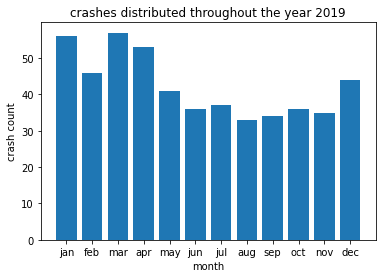

In [55]:
#statistical assertions
#crashes distributed throughout the year 2019
sd1=data['Crash Month'].value_counts()
print("Crash count in each month:")
ct=[]
month=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
for i in range(1,13):
  ct.append(sd1[i])
print(ct)
plot.title("crashes distributed throughout the year 2019")
plot.bar(month,ct)
plot.xlabel("month")
plot.ylabel("crash count")
plot.show() 

[60, 71, 75, 74, 68, 77, 83]


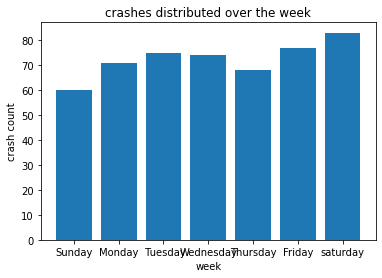

In [56]:
#Crashes are exponentially distributed over week days
sd2 = data['Week Day Code'].value_counts()
ct1=[]
week=["Sunday","Monday"," Tuesday", "Wednesday", "Thursday", "Friday", "saturday"]
for i in range(1,8):
  ct1.append(sd2[i])
print(ct1)
plot.title("crashes distributed over the week")
plot.bar(week,ct1)
plot.xlabel("week")
plot.ylabel("crash count")
plot.show() 
#over the week the crash count increases, sunday has less crash count whereas saturday(end of the week) gives high count.

Part C

From the above assertions, we could see few assertions failed. Both the limit assertions returned false, it should actually be true. This is because of null values. inter record assertion has also returned false. so I have split the data into three tables "crash","vehicle" and "participant"

In [13]:
#part D
CrashDF=data[data['Record Type']==1]
VehiclesDF = data[data['Record Type'] == 2]
ParticipantsDF = data[data['Record Type'] == 3]

CrashesDF = CrashDF.dropna(axis=1,how='all')
#CrashesDF.head()
VehiclesDF = VehiclesDF.dropna(axis=1,how='all')
#VehiclesDF.head()
ParticipantsDF = ParticipantsDF.dropna(axis=1,how='all')


In [14]:
CrashesDF.head(5)


,Crash ID,Record Type,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,...,Crash Level Event 1 Code,Crash Level Event 2 Code,Crash Level Event 3 Code,Crash Level Cause 1 Code,Crash Level Cause 2 Code,Crash Level Cause 3 Code,School Zone Indicator,Work Zone Indicator,Secondary Crash Indicator,Alcohol-Involved Flag,Drugs Involved Flag,Crash Marijuana Involved Flag,Speed Involved Flag,Crash Level Hit & Run Flag,Population Range Code,Road Control,Route Type,Region ID,District ID,Segment Marker ID,Segment Point LRS Measure,Unlocatable Flag,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Non-Fatal Injury Count,Total Un-Injured Children Age 00-04,Total Un-Injured Persons,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count
0,1809119,1,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,9.0,16.77,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,8.0,US,26.0,1.0,02C,293_10835,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0
5,1809229,1,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,1504.0,426,1.0,4.0,22.59,50.0,3.0,0.0,NaN,0.0,0.0,0.0,4.0,NaN,...,NaN,18.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,US,26.0,1.0,02C,293_8495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
9,1809637,1,1811.0,5.0,17.0,2019.0,6.0,99.0,3.0,0.0,0.0,2.0,1.0,26.0,1.0,6.0,0.0,1.0,0026BG100S00,45.0,17.0,0.84,-121.0,42.0,58.38,0.0,NaN,NaN,NaN,0.0,57.56,55.0,7.0,1.0,NaN,0.0,0.0,0.0,1.0,NaN,...,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,5.0,NaN,NaN,1.0,02C,293_6389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
12,1810874,1,99981.0,4.0,7.0,2019.0,1.0,0.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,50.60,-122.0,33.0,59.51,0.0,1940.0,9715,1.0,7.0,5.69,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,4.0,19.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,9.0,2.0,US,26.0,1.0,02B,293_12196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
16,1812266,1,5970.0,7.0,8.0,2019.0,2.0,14.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,52.99,-122.0,30.0,38.24,0.0,1940.0,5148,1.0,9.0,8.55,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,4.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,2.0,US,26.0,1.0,02B,293_18831,0.0,4.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,2.0,0.0,3.0
26,1815964,1,99980.0,10.0,28.0,2019.0,2.0,6.0,26.0,83.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,28.0,36.69,-122.0,23.0,48.47,0.0,1020.0,1534,1.0,9.0,15.44,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,NaN,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,8.0,4.0,US,26.0,1.0,02C,293_763,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0
31,1816804,1,4207.0,11.0,23.0,2019.0,7

In [15]:
VehiclesDF.head(15)

,Crash ID,Record Type,Vehicle ID,Vehicle Coded Seq#,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity
1,1809119,2,3409578.0,1.0,1.0,0.0,9.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1809119,2,3409579.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,15.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0,0.0
6,1809229,2,3409765.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
10,1809637,2,3410470.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,62.0,10.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13,1810874,2,3412622.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
17,1812266,2,3415030.0,1.0,9.0,0.0,1.0,0.0,0.0,1.0,4.0,8.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0
19,1812266,2,3415031.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,2.0,0.0
22,1812266,2,3415032.0,3.0,9.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,22.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24,1812266,2,3415033.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,22.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
27,1815964,2,3421313.0,1.0,9.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [16]:
ParticipantsDF.head(15)

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,9.0,9.0,0.0
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,41.0,2.0,4.0,9.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,3.0,0.0,0.0,2.0,32.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,50.0,70.0,NaN,NaN,18.0,NaN,NaN,NaN,0.0,9.0,1.0,0.0
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,90.0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,47.0,81.0,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0
14,1810874,3,3412622.0,3890872.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,44.0,1.0,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,0.0,0.0
15,1810874,3,0.0,3890873.0,2.0,NaN,1.0,3.0,0.0,0.0,1.0,48.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,5.0,2.0,35.0,20.0,55.0,NaN,4.0,19.0,NaN,NaN,0.0,9.0,1.0,0.0
18,1812266,3,3415030.0,3893223.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,20.0,3.0,1.0,3.0,9.0,1.0,NaN,NaN,NaN,NaN,0.0,20.0,47.0,51.0,4.0,1.0,33.0,NaN,86.0,NaN,1.0,0.0
20,1812266,3,3415031.0,3893224.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,59.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0
21,1812266,3,3415031.0,3893225.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,60.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,15.0,0.0,1.0,0.0


In [57]:
#Existence assertion
ea1 =CrashesDF[CrashesDF['Crash ID']!="NaN"]
print(ea1)
ea2 =data[data['Record Type']!="NaN"]
print(ea2)
#All rows are returned, so it is existent

      Crash ID  ...  Total Vehicle Occupant Count
0      1809119  ...                           1.0
5      1809229  ...                           0.0
9      1809637  ...                           0.0
12     1810874  ...                           0.0
16     1812266  ...                           3.0
...        ...  ...                           ...
2716   1860371  ...                           1.0
2719   1860417  ...                           0.0
2724   1860427  ...                           1.0
2729   1860453  ...                           0.0
2734   1860771  ...                           1.0

[508 rows x 93 columns]
      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   

In [18]:
#Limit assertion
bool_series = ParticipantsDF['Age'].between(0.0,9.0)
print(bool_series) #The "NaN" values show False others are true

2        True
4        True
7        True
8       False
11       True
        ...  
2728     True
2731     True
2733     True
2736     True
2738     True
Name: Age, Length: 1216, dtype: bool


In [19]:
#Limit assertion
bool_series = CrashesDF['Week Day Code'].between(1.0,7.0)
bool_series.all()

True

In [20]:
#Inter record assertions
inter_a1=CrashesDF['Latitude Degrees']==45.0
print(inter_a1.all()) 
inter_a2 = CrashesDF['Latitude Minutes'].between(17.0,41.0)
print("Latitude Minutes")
inter_a2.all() 
#Both are true

True
Latitude Minutes


True

In [21]:
#summary assertions
print(len(CrashesDF['Crash ID'].unique().tolist()))
print(len(ParticipantsDF['Participant ID'].unique().tolist()))
#Both have returned the count of total rows in the tables. so it is correct

508
1216


In [22]:
#referential assertions
ra1 = CrashesDF[['Crash ID','County Code']]
ra1.isnull().all() #To check if there are null values
#it returns false which shows there is crashid for all country code

Crash ID       False
County Code    False
dtype: bool

In [23]:
ra2 = VehiclesDF[['Crash ID','Vehicle ID']]
ra2.isnull().all() #To check if there are null value 
#it returns false which shows there is crashid for all vehicle id

Crash ID      False
Vehicle ID    False
dtype: bool

Crash count in each month:
[56, 46, 57, 53, 41, 36, 37, 33, 34, 36, 35, 44]


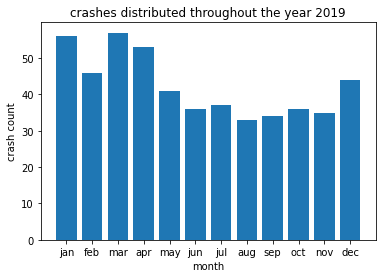

In [42]:
#statistical assertions
#crashes distributed throughout the year 2019
sd1=CrashesDF['Crash Month'].value_counts()
print("Crash count in each month:")
ct=[]
month=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
for i in range(1,13):
  ct.append(sd1[i])
print(ct)
plot.title("crashes distributed throughout the year 2019")
plot.bar(month,ct)
plot.xlabel("month")
plot.ylabel("crash count")
plot.show() 

[60, 71, 75, 74, 68, 77, 83]


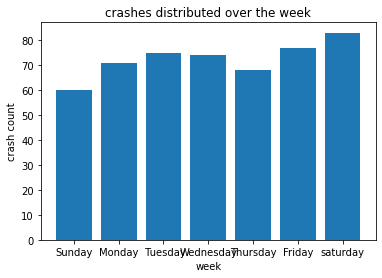

In [54]:
#Crashes are uniformly distributed over week days
sd2 = CrashesDF['Week Day Code'].value_counts()
ct1=[]
week=["Sunday","Monday"," Tuesday", "Wednesday", "Thursday", "Friday", "saturday"]
for i in range(1,8):
  ct1.append(sd2[i])
print(ct1)
plot.title("crashes distributed over the week")
plot.bar(week,ct1)
plot.xlabel("week")
plot.ylabel("crash count")
plot.show() 
#over the week the crash count increases, sunday has less crash count whereas saturday(end of the week) gives high count.

In [25]:
#Part E
#Limit assertion

age_ParticipantsDF=ParticipantsDF.dropna(subset=['Age'])
print(age_ParticipantsDF) # This has all rows with non null age values
#checking if age_participants have no null age values
bool_series = age_ParticipantsDF['Age']!="NaN"
print(bool_series.all()) #It returns True meaning there is no null values in age column
check = age_ParticipantsDF['Age'].between(0.0,9.0)
print(check.all()) #it now returns true, limit assertion satisfied!

      Crash ID  Record Type  ...  Participant Event 2 Code  Participant Event 3 Code
2      1809119            3  ...                       0.0                       0.0
4      1809119            3  ...                       9.0                       0.0
7      1809229            3  ...                       0.0                       0.0
11     1809637            3  ...                       0.0                       0.0
14     1810874            3  ...                       0.0                       0.0
...        ...          ...  ...                       ...                       ...
2728   1860427            3  ...                       0.0                       0.0
2731   1860453            3  ...                       NaN                       0.0
2733   1860453            3  ...                       NaN                       0.0
2736   1860771            3  ...                       NaN                       0.0
2738   1860771            3  ...                       NaN       